<a href="https://colab.research.google.com/github/A-THAKUR22/MarchAssignments/blob/main/Assignment15March27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are tasked with building a machine learning model to predict the survival outcomes of passengers aboard the Titanic. The dataset you will be working with is the Titanic Data Set from Kaggle, which contains information about passengers such as their age, gender, class, ticket fare, and whether they survived or not.

The goal is to implement Logistic Regression in Python for classification, specifically predicting whether a passenger survived (1) or deceased (0) based on the given features.

Here are the steps you need to follow:

Import necessary libraries including pandas, numpy, matplotlib, seaborn, and sklearn.
Read the Titanic dataset ('titanic_train.csv') into a pandas dataframe.
Perform exploratory data analysis (EDA) to understand the data, including checking for missing data, visualizing distributions, and analyzing correlations between features.
Clean the data by handling missing values, converting categorical features into numerical format, and dropping unnecessary columns.
Split the data into training and testing sets using train_test_split from sklearn.
Build a Logistic Regression model using LogisticRegression from sklearn.
Train the model on the training data and make predictions on the testing data.
Evaluate the model's performance using classification metrics such as precision, recall, and f1-score.
Additionally, you can explore further feature engineering techniques such as extracting titles from names, utilizing cabin information, or extracting insights from ticket numbers to improve the model's predictive accuracy.

Your final task is to provide a comprehensive analysis of the model's performance and suggest potential areas for improvement or additional feature engineering.

In [176]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt

In [177]:
#Read the data sets
titanic=pd.read_csv('titanic_train.csv')
titanic
titanic_test=pd.read_csv('titanic_test.csv')

In [178]:
#Check for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [179]:
#Fill the null values and drop the columns with null values if necessary
median_age=titanic['Age'].median()
titanic['Age'].fillna(median_age,inplace=True)


titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [180]:
titanic.drop('Cabin',axis=1, inplace=True)

In [181]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [182]:
mode_embarked=titanic['Embarked'].mode()[0]
titanic['Embarked'].fillna(mode_embarked,inplace=True)

In [183]:
#Filling the null values and dropping them if necessary in test data
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [184]:
titanic_test.drop('Cabin',axis=1, inplace=True)
med_age=titanic_test['Age'].median()
titanic_test['Age'].fillna(med_age,inplace=True)
medfare_age=titanic['Fare'].median()
titanic_test['Fare'].fillna(median_age,inplace=True)


In [185]:
#Performing label encoding with the categorical data values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic_test['encoded_embarked']=encoder.fit_transform(titanic_test['Embarked'])
titanic_test['Sex_encoded']=encoder.fit_transform(titanic_test['Sex'])


In [214]:
#Using the necessary features from the test data
test_data=titanic_test[['Pclass','Parch','SibSp','Age','Sex_encoded']]

In [187]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

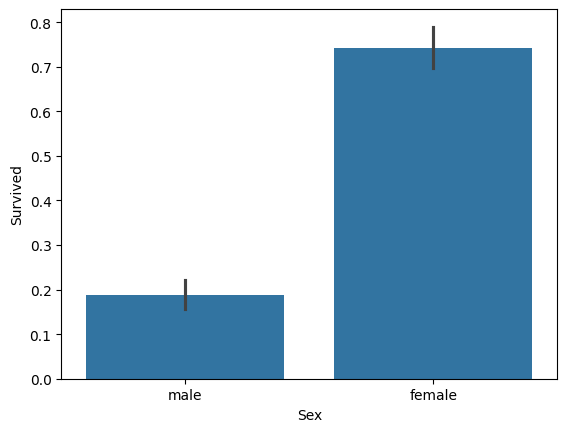

In [188]:
#Plotting graphs between the features of the dataset (EDA)
sns.barplot(data=titanic,x='Sex',y='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

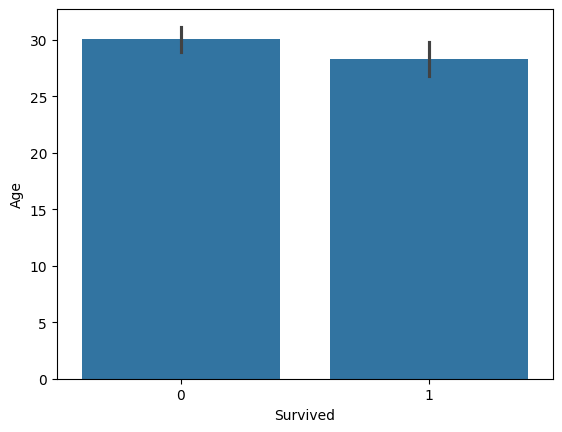

In [189]:
sns.barplot(data=titanic,x='Survived',y='Age')

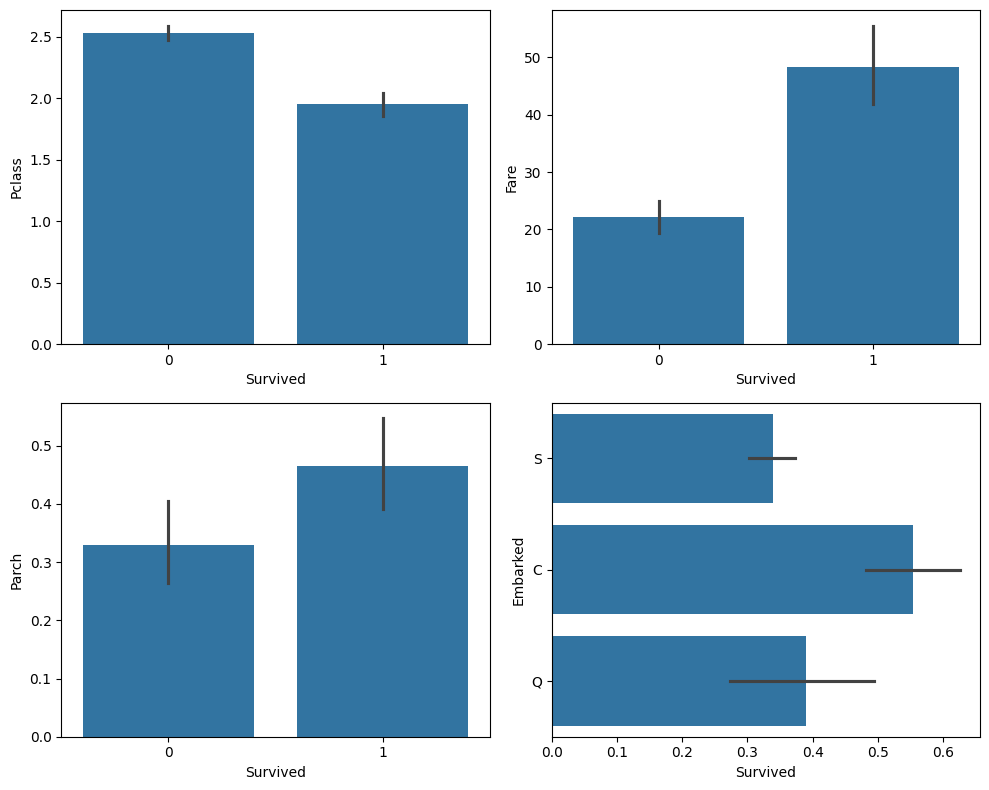

In [190]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.barplot(x='Survived', y='Pclass', data=titanic, ax=axes[0, 0])
sns.barplot(x='Survived', y='Fare', data=titanic, ax=axes[0, 1])
sns.barplot(x='Survived', y='Parch', data=titanic, ax=axes[1, 0])
sns.barplot(x='Survived', y='Embarked', data=titanic, ax=axes[1, 1])

plt.tight_layout()

<ipython-input-191-6c2b486ea3e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_titanic=titanic.corr()


<Axes: >

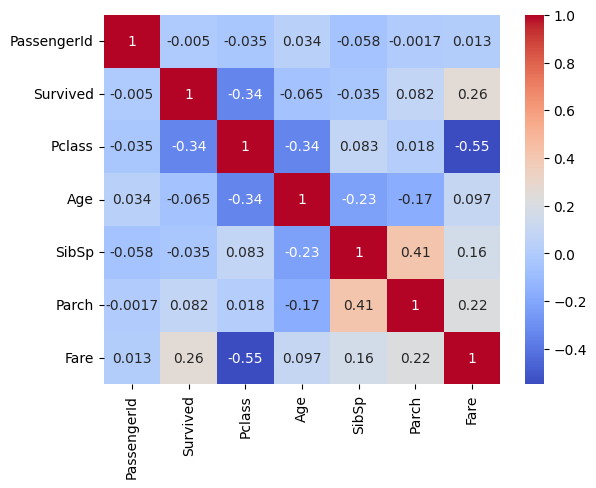

In [191]:
#Checking the correlation of each variable
correlation_titanic=titanic.corr()
sns.heatmap(correlation_titanic,annot=True,cmap='coolwarm')

In [192]:
corr_survived=titanic.corr()['Survived'].drop('Survived')
corr_survived

<ipython-input-192-c5ad20fdfe66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_survived=titanic.corr()['Survived'].drop('Survived')


PassengerId   -0.005007
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [194]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic['encoded_embarked']=encoder.fit_transform(titanic['Embarked'])
titanic['Sex_encoded']=encoder.fit_transform(titanic['Sex'])
corr_survived=titanic.corr()['Survived'].drop('Survived')
corr_survived

<ipython-input-194-bc21d5f2aef2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_survived=titanic.corr()['Survived'].drop('Survived')


PassengerId        -0.005007
Pclass             -0.338481
Age                -0.064910
SibSp              -0.035322
Parch               0.081629
Fare                0.257307
encoded_embarked   -0.167675
Sex_encoded        -0.543351
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='Age'>

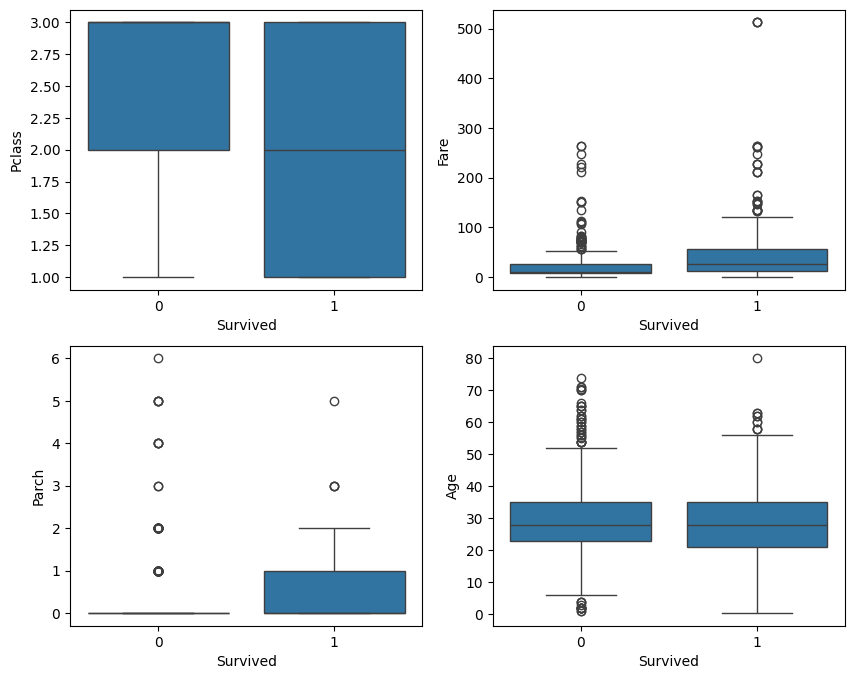

In [195]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.boxplot(x='Survived', y='Pclass', data=titanic, ax=axes[0, 0])
sns.boxplot(x='Survived', y='Fare', data=titanic, ax=axes[0, 1])
sns.boxplot(x='Survived', y='Parch', data=titanic, ax=axes[1, 0])
sns.boxplot(x='Survived', y='Age', data=titanic, ax=axes[1, 1])



<Axes: xlabel='Sex', ylabel='Survived'>

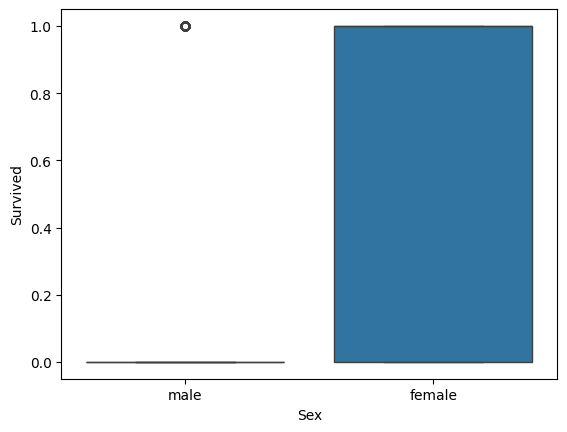

In [196]:
sns.boxplot(x='Sex',y='Survived',data=titanic)

In [208]:
#Dividing the variables into features and target variable
X=titanic[['Pclass','Parch','SibSp','Age','Sex_encoded']]
y=titanic['Survived']


In [209]:
X

,Pclass,Parch,SibSp,Age,Sex_encoded
0,3,0,1,22.0,1
1,1,0,1,38.0,0
2,3,0,0,26.0,0
3,1,0,1,35.0,0
4,3,0,0,35.0,1
...,...,...,...,...,...
886,2,0,0,27.0,1
887,1,0,0,19.0,0
888,3,2,1,28.0,0
889,1,0,0,26.0,1


In [215]:
test_data

,Pclass,Parch,SibSp,Age,Sex_encoded
0,3,0,0,34.5,1
1,3,0,1,47.0,0
2,2,0,0,62.0,1
3,3,0,0,27.0,1
4,3,1,1,22.0,0
...,...,...,...,...,...
413,3,0,0,27.0,1
414,1,0,0,39.0,0
415,3,0,0,38.5,1
416,3,0,0,27.0,1


In [216]:
#Splliting the data into training and testing data and creating the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [217]:
#Making predictions od the passengers who survived
y_pred=model.predict(X_test)
y_pred2=model.predict(X_train)

print(f'The predictions of passengers who survived are:{y_pred}\n')


The predictions of passengers who survived are:[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]



In [220]:
#Measuring the accuracy of the model and other performance metrics
Accuracy=accuracy_score(y_test,y_pred)

Accuracy2=accuracy_score(y_train,y_pred2)

Recall_score=recall_score(y_test,y_pred)
F1=f1_score(y_test,y_pred)
Precision=precision_score(y_test,y_pred)

print(f'Test Accuracy: {Accuracy}')

print(f'Train Accuracy: {Accuracy2}')

print(f'Recall: {Recall_score}')
print(f'F1 score :{F1}')
print(f'Precision :{Precision}')

Test Accuracy: 0.8156424581005587
Train Accuracy: 0.7851123595505618
Recall: 0.7567567567567568
F1 score :0.7724137931034482
Precision :0.7887323943661971


In [218]:
#Making predictions on the separate test data
y_pred1=model.predict(test_data)
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,